# EXPLORATORY DATA ANALYSIS OF "CATCH THE PINK FLAMINGO GAME"

# Setting Up PySpark in Colab
Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, our first task is to download Java.

In [ ]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u312-b07-0ubuntu1~18.

In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2022-05-19 18:05:35--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  38.2MB/s    in 7.4s    

2022-05-19 18:05:43 (35.1 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [ ]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
import pyspark
import numpy as np
import pandas as pd

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master('local[*]').appName('ExploratoryDtataAnalysis').getOrCreate()

# Read data from CSV file
buy_clicks = spark.read.csv('/content/buy-clicks.csv', sep=',', header=True, inferSchema=True, nullValue='NA')

buy_clicks.show(5)

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
+-------------------+----+-------------+----+------+-----+-----+
only showing top 5 rows



# Covert Spark Dataframe to Pandas Dataframe
This is done to allow for better visualization

In [ ]:
clicks=buy_clicks.toPandas()

In [ ]:
clicks

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0
...,...,...,...,...,...,...,...
2942,2016-06-16 10:36:54,39838,34373,35,305,0,1.0
2943,2016-06-16 10:36:54,39839,37360,168,2016,1,2.0
2944,2016-06-16 10:36:54,39840,34542,64,68,2,3.0
2945,2016-06-16 10:36:54,39841,38277,27,667,4,10.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Counts=clicks.groupby('buyId').size().reset_index(name='Count')

In [ ]:
Counts.head(10)

,buyId,Count
0,0,592
1,1,269
2,2,714
3,3,337
4,4,425
5,5,610


In [ ]:
Count=Counts['Count']
Item_Id=Counts['buyId']

#Creating Visualization from by_clicks csv

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#Number of times each items are purchased

[Text(0.5, 1.0, 'Number of times each item is purchased')]

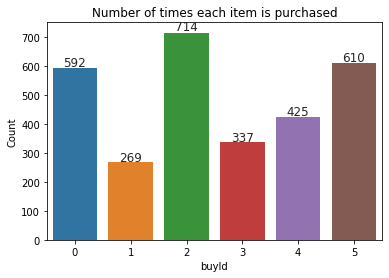

In [ ]:
#Count.plot.bar(x="buyId", y="Total", rot=0, title="Number of time each item is purchased")
#ax=sns.barplot(x=buyId, y=Total, data=Count, palette='flare_r')
p=sns.barplot(x=Item_Id, y=Count, data=Counts, ci=None)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="Number of times each item is purchased")

In [ ]:
revenuePerUser = clicks.groupby('userId').sum()
revenuePerUser = revenuePerUser.reset_index()

In [ ]:
revenuePerUser.head(5)

,userId,txId,userSessionId,team,buyId,price
0,1,196541,176214,891,12,21.0
1,8,166185,150134,620,19,53.0
2,9,123847,108215,582,26,80.0
3,10,268089,251947,1310,1,11.0
4,12,296419,253060,858,57,215.0


In [ ]:
revenuePerUser.head(15)

,userId,txId,userSessionId,team,buyId,price
0,1,196541,176214,891,12,21.0
1,8,166185,150134,620,19,53.0
2,9,123847,108215,582,26,80.0
3,10,268089,251947,1310,1,11.0
4,12,296419,253060,858,57,215.0
5,13,190159,173738,468,13,20.0
6,15,66868,61449,148,0,2.0
7,21,142076,126330,72,10,19.0
8,26,70561,65886,346,0,2.0
9,27,75689,69194,140,2,4.0


In [ ]:
rev1=revenuePerUser.iloc[:,[0,5]]

rev1
#df.sort_values(by='tweet_volume', inplace=True, ascending=False)


,userId,price
0,1,21.0
1,8,53.0
2,9,80.0
3,10,11.0
4,12,215.0
...,...,...
541,2379,27.0
542,2383,18.0
543,2384,36.0
544,2386,3.0


In [ ]:
rev1.columns = ['userId', 'revenue'] #rename the columns

In [ ]:
rev1.head(5)

,userId,revenue
0,1,21.0
1,8,53.0
2,9,80.0
3,10,11.0
4,12,215.0


In [ ]:
rev1.sort_values(by=['revenue'], inplace=True,ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
rev1
rev1.count()

userId     546
revenue    546
dtype: int64

In [ ]:
rev2=rev1.iloc[0:5,:]
rev2


,userId,revenue
504,2229,223.0
4,12,215.0
107,471,202.0
115,511,200.0
227,1027,189.0


In [ ]:
userId=rev2['userId']
revenue=rev2['revenue']

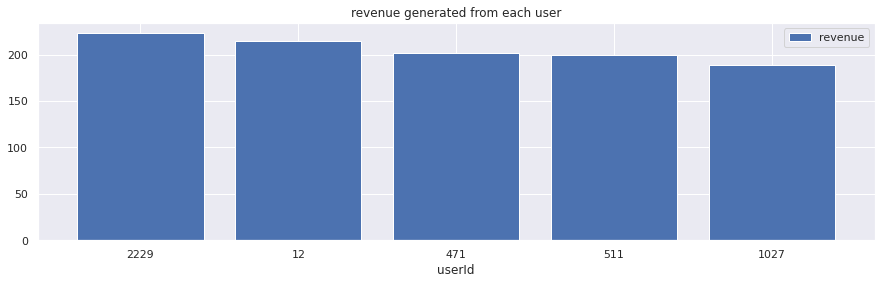

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  
if __name__ == '__main__':
  rev2.plot.bar(x="userId", y="revenue", rot=0, width=0.8,figsize=(15,4), title="revenue generated from each user")
  plt.show()

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + int(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# The Revenue generated from each user

[Text(0.5, 1.0, 'revenue generated from each user')]

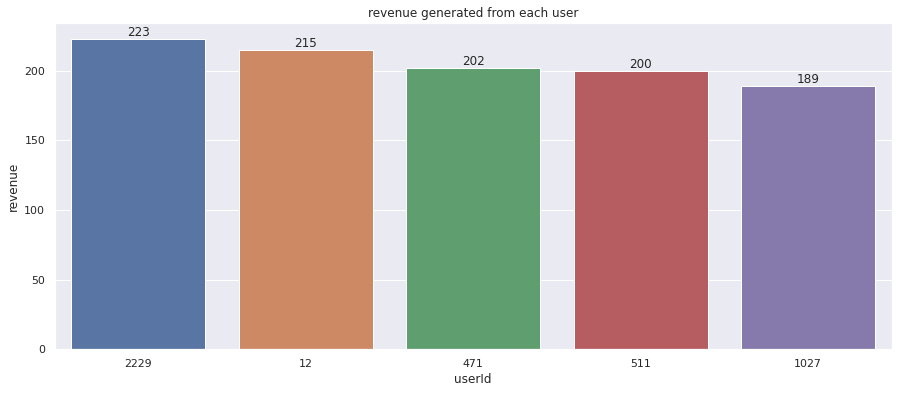

In [ ]:
p=sns.barplot(x=userId, y=revenue, data=rev2, ci=None,order=rev2.sort_values('revenue', ascending=False).userId)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="revenue generated from each user")

In [ ]:
clicks.head()

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0


In [ ]:
RevenueItem = clicks.groupby('buyId').sum()
RevenueItem = RevenueItem.reset_index()

In [ ]:
RevenueItem

,buyId,txId,userSessionId,team,userId,price
0,0,15071080,13546442,42962,710892,592.0
1,1,6790676,6095271,18472,317670,538.0
2,2,18165871,16252202,50301,820870,2142.0
3,3,8447044,7605052,23545,411539,1685.0
4,4,11222443,10154777,30129,526393,4250.0
5,5,15283439,13787621,41821,712078,12200.0


In [ ]:
revItem=RevenueItem.iloc[:,[0,5]]

revItem

,buyId,price
0,0,592.0
1,1,538.0
2,2,2142.0
3,3,1685.0
4,4,4250.0
5,5,12200.0


In [ ]:
revItem.columns = ['ItemId(buyId)', 'revenue'] #rename the columns

In [ ]:
revItem.sort_values(by=['revenue'], inplace=True,ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
revItem2=revItem.iloc[0:6,:]
revItem2

,ItemId(buyId),revenue
5,5,12200.0
4,4,4250.0
2,2,2142.0
3,3,1685.0
0,0,592.0
1,1,538.0


In [ ]:
revItem2.describe()

,ItemId(buyId),revenue
count,6.000000,6.000000
mean,2.500000,3567.833333
std,1.870829,4440.567280
min,0.000000,538.000000
25%,1.250000,865.250000
50%,2.500000,1913.500000
75%,3.750000,3723.000000
max,5.000000,12200.000000


In [ ]:
ItemId_buyId=revItem2['ItemId(buyId)']
revenue=revItem2['revenue']

#Revenue generated from items in the game

[Text(0.5, 1.0, 'revenue generated from each items')]

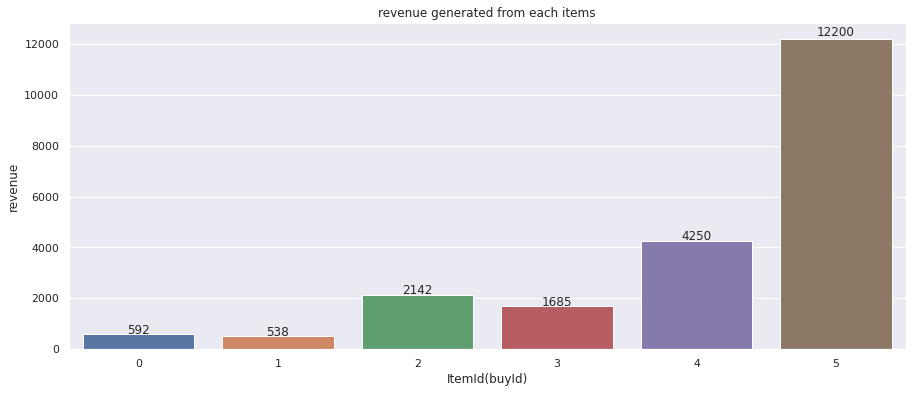

In [ ]:
p=sns.barplot(x=ItemId_buyId, y=revenue, data=revItem2, ci=None)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="revenue generated from each items")

In [ ]:
user_session=pd.read_csv("/content/user-session.csv")

In [ ]:
user_session.head(5)

,timestamp,userSessionId,userId,teamId,assignmentId,sessionType,teamLevel,platformType
0,2016-05-26 14:47:30,5675,170,90,5423,start,1,iphone
1,2016-05-27 00:06:54,5675,170,90,5423,end,1,iphone
2,2016-05-26 14:43:09,5795,835,39,5300,start,1,android
3,2016-05-27 08:06:54,5795,835,39,5300,end,1,android
4,2016-05-26 14:47:20,5833,624,2,5529,start,1,iphone


In [ ]:
user_session.drop("timestamp", axis=1, inplace=True)

# Visualization Using Combined-data

In [ ]:
df=pd.read_csv("/content/combined-data1.csv")

In [ ]:
df.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
0,812,5648,1,android,69,8,NaN,NaN
1,1658,5649,1,iphone,31,5,NaN,NaN
2,1589,5650,1,iphone,26,2,NaN,NaN
3,1863,5651,1,android,35,4,NaN,NaN
4,937,5652,1,android,39,0,1.0,1.0


In [ ]:
df1=df.dropna()

In [ ]:
df1.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
4,937,5652,1,android,39,0,1.0,1.0
11,1623,5659,1,iphone,129,9,1.0,10.0
13,83,5661,1,android,102,14,1.0,5.0
17,121,5665,1,android,39,4,1.0,3.0
18,462,5666,1,android,90,10,1.0,3.0


In [ ]:
newCombined=df1.groupby(['userId','avg_price']).sum().reset_index()

In [ ]:
newCombined.head(20)

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId
0,1,2.00,39651,11,194,30,4.0
1,1,2.50,21014,6,120,11,2.0
2,1,3.00,10041,3,93,9,2.0
3,8,11.00,27918,5,182,23,3.0
4,9,10.00,21897,6,108,12,2.0
5,9,15.00,43159,12,204,21,4.0
6,10,1.00,64088,8,1630,174,5.0
7,10,1.50,24461,4,456,50,2.0
8,12,10.00,9914,3,90,8,1.0
9,12,11.00,20829,6,95,12,2.0


#Devices/Platforms used in Playing the Game

In [ ]:
newCombined1=df1.groupby('platformType').size().reset_index(name='Total')

In [ ]:
newCombined1.head()

,platformType,Total
0,android,513
1,iphone,555
2,linux,96
3,mac,44
4,windows,203


In [ ]:
platformType=newCombined1['platformType']
Total=newCombined1['Total']
explode=[0,0,0,0.1,0]

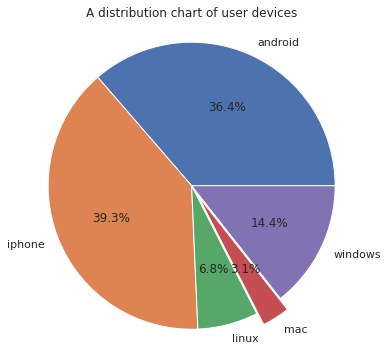

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#plot = newCombined1.plot.pie(y='Total', figsize=(7, 7), title='platformType',labels=platformType,autopct='%2.1f%%')
plt.pie(Total, labels = platformType,radius=1.1, autopct='%2.1f%%', explode=explode)
plt.title('A distribution chart of user devices')
plt.show()

In [ ]:
newCombined['hit_ratio']=(newCombined['count_hits']/newCombined['count_gameclicks'])*100

In [ ]:
newCombined.head(15)

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,hit_ratio
0,1,2.00,39651,11,194,30,4.0,15.463918
1,1,2.50,21014,6,120,11,2.0,9.166667
2,1,3.00,10041,3,93,9,2.0,9.677419
3,8,11.00,27918,5,182,23,3.0,12.637363
4,9,10.00,21897,6,108,12,2.0,11.111111
5,9,15.00,43159,12,204,21,4.0,10.294118
6,10,1.00,64088,8,1630,174,5.0,10.674847
7,10,1.50,24461,4,456,50,2.0,10.964912
8,12,10.00,9914,3,90,8,1.0,8.888889
9,12,11.00,20829,6,95,12,2.0,12.631579


In [ ]:
newCombined.sort_values(by=['hit_ratio'], inplace=True,ascending=False)

In [ ]:
newCombined.head(5)

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,hit_ratio
880,1954,2.00,25617,6,13,5,2.0,38.461538
170,378,20.00,33248,7,6,2,1.0,33.333333
349,867,11.67,26666,7,101,28,3.0,27.722772
564,1294,5.50,25003,6,15,4,2.0,26.666667
474,1097,7.50,31614,6,107,27,2.0,25.233645


In [ ]:
#team_level=df1.groupby('teamLevel').size().reset_index()
team_level = df1.groupby(['userId','teamLevel']).agg({'count_gameclicks': 'sum', 'count_hits': 'sum','avg_price':'sum'}).reset_index()

In [ ]:
team_level.head(7)

,userId,teamLevel,count_gameclicks,count_hits,avg_price
0,1,3,93,9,3.0
1,1,4,88,14,2.0
2,1,6,120,11,2.5
3,1,7,106,16,2.0
4,8,5,182,23,11.0
5,9,2,17,1,10.0
6,9,4,91,11,10.0


In [ ]:
hit_rate=team_level['hit_rate']=((team_level['count_hits']/team_level['count_gameclicks'])*100)

In [ ]:
team_level.head(25)

,userId,teamLevel,count_gameclicks,count_hits,avg_price,hit_rate
0,1,3,93,9,3.00,9.677419
1,1,4,88,14,2.00,15.909091
2,1,6,120,11,2.50,9.166667
3,1,7,106,16,2.00,15.094340
4,8,5,182,23,11.00,12.637363
5,9,2,17,1,10.00,5.882353
6,9,4,91,11,10.00,12.087912
7,9,5,98,8,15.00,8.163265
8,9,7,106,13,15.00,12.264151
9,10,1,561,64,1.00,11.408200


In [ ]:
team_level1 = df1.groupby(['teamLevel']).sum().reset_index()

In [ ]:
team_level1.head()

,teamLevel,userId,userSessionId,count_gameclicks,count_hits,count_buyId,avg_price
0,1,89139,702976,12859,1392,99.0,585.00
1,2,132452,1143025,19005,2095,143.0,730.67
2,3,175453,1954793,21490,2387,209.0,1017.25
3,4,253413,3103297,32786,3757,305.0,1378.84
4,5,325371,4986161,40821,4581,453.0,1999.69


#Number of clicks per level in the game

[Text(0.5, 1.0, 'number of clicks per level')]

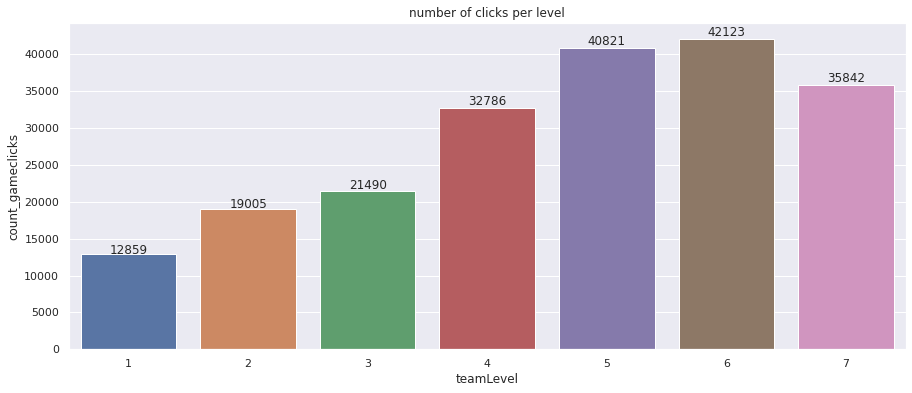

In [ ]:
teamLevel=team_level1['teamLevel']
count_gameclick=team_level1['count_gameclicks']
p=sns.barplot(x=teamLevel, y=count_gameclick,data=team_level1, ci=None,)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="number of clicks per level")

#Amount Spent in each level in the game


[Text(0.5, 1.0, 'amount spent in each level')]

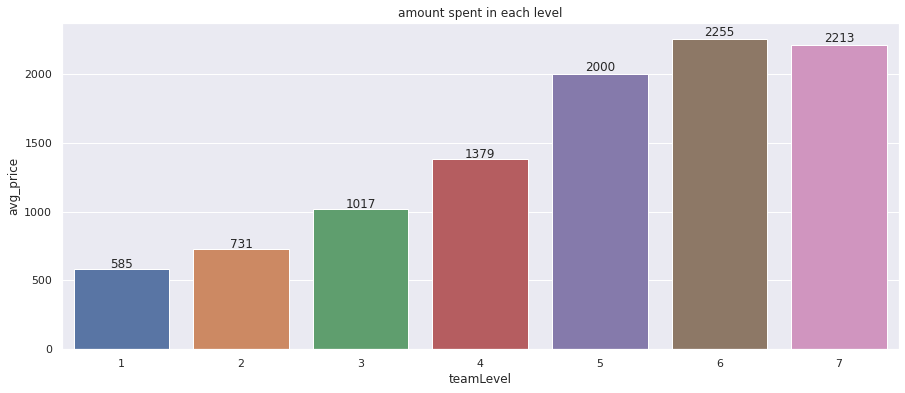

In [ ]:
teamLevel=team_level1['teamLevel']
avg_price=team_level1['avg_price']
p=sns.barplot(x=teamLevel, y=avg_price,data=team_level, ci=None,)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="amount spent in each level")

#Visualizing Users with highest hit_ratio or hit_accuracy

In [ ]:
newCombined.head()

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,hit_ratio
880,1954,2.00,25617,6,13,5,2.0,38.461538
170,378,20.00,33248,7,6,2,1.0,33.333333
349,867,11.67,26666,7,101,28,3.0,27.722772
564,1294,5.50,25003,6,15,4,2.0,26.666667
474,1097,7.50,31614,6,107,27,2.0,25.233645


In [ ]:
newCombined.round({"hit_ratio":1})

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,hit_ratio
880,1954,2.00,25617,6,13,5,2.0,38.5
170,378,20.00,33248,7,6,2,1.0,33.3
349,867,11.67,26666,7,101,28,3.0,27.7
564,1294,5.50,25003,6,15,4,2.0,26.7
474,1097,7.50,31614,6,107,27,2.0,25.2
...,...,...,...,...,...,...,...,...
50,90,2.00,7589,2,27,1,1.0,3.7
375,935,10.00,5887,1,57,2,1.0,3.5
119,265,5.00,32590,7,76,2,1.0,2.6
128,286,5.00,19074,5,39,1,1.0,2.6


In [ ]:
newCombined.sort_values(by=['hit_ratio'], inplace=True,ascending=False)

In [ ]:
aa=newCombined.round({"hit_ratio":1})

In [ ]:
aa['hit_ratio(%)']=aa['hit_ratio'].astype(str)+'%'

In [ ]:
aa.head()

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,hit_ratio,hit_ratio(%)
880,1954,2.00,25617,6,13,5,2.0,38.5,38.5%
170,378,20.00,33248,7,6,2,1.0,33.3,33.3%
349,867,11.67,26666,7,101,28,3.0,27.7,27.7%
564,1294,5.50,25003,6,15,4,2.0,26.7,26.7%
474,1097,7.50,31614,6,107,27,2.0,25.2,25.2%


In [ ]:
aa_ten=aa.iloc[:10,[0,7]]


In [ ]:
aa_ten

,userId,hit_ratio
880,1954,38.5
170,378,33.3
349,867,27.7
564,1294,26.7
474,1097,25.2
398,981,25.0
447,1059,23.9
922,2084,22.6
506,1155,22.5
877,1948,22.0


In [ ]:
aa_grouped = aa.groupby(['userId','teamLevel']).agg({'count_gameclicks': 'sum', 'count_hits': 'sum','avg_price':'sum','hit_ratio':'mean'}).reset_index()

[Text(0.5, 1.0, 'user hit ratio')]

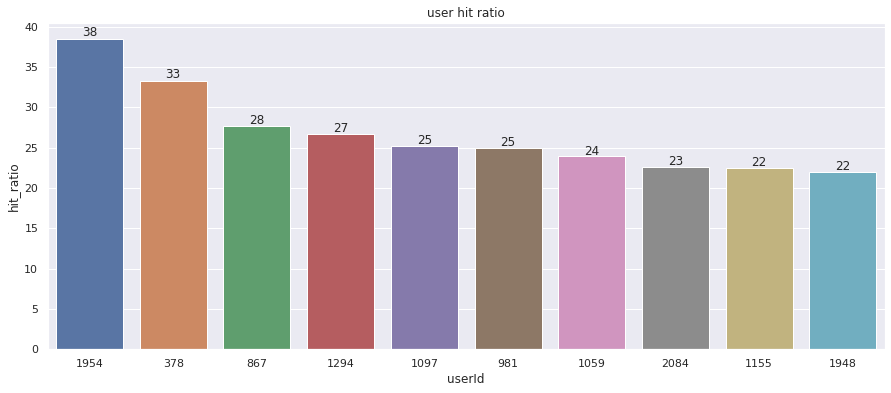

In [ ]:
userId=aa_ten['userId']
hit_ratio=aa_ten['hit_ratio']
p=sns.barplot(x=userId, y=hit_ratio,data=aa_ten, ci=None,order=aa_ten.sort_values('hit_ratio', ascending=False).userId)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="user hit ratio")

In [ ]:
df1.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
4,937,5652,1,android,39,0,1.0,1.0
11,1623,5659,1,iphone,129,9,1.0,10.0
13,83,5661,1,android,102,14,1.0,5.0
17,121,5665,1,android,39,4,1.0,3.0
18,462,5666,1,android,90,10,1.0,3.0


In [ ]:
dataGrouped=df1.groupby(['userId','teamLevel']).sum().reset_index()

In [ ]:
dataGrouped.head(10)

,userId,teamLevel,userSessionId,count_gameclicks,count_hits,count_buyId,avg_price
0,1,3,10041,93,9,2.0,3.0
1,1,4,12713,88,14,2.0,2.0
2,1,6,21014,120,11,2.0,2.5
3,1,7,26938,106,16,2.0,2.0
4,8,5,27918,182,23,3.0,11.0
5,9,2,9187,17,1,1.0,10.0
6,9,4,12710,91,11,1.0,10.0
7,9,5,16228,98,8,2.0,15.0
8,9,7,26931,106,13,2.0,15.0
9,10,1,16583,561,64,3.0,1.0


#Visualizing the AdCategory

In [ ]:
ad_clicks = spark.read.csv('/content/ad-clicks.csv', sep=',', header=True, inferSchema=True, nullValue='NA')
ad_clicks.show(10)


+-------------------+----+-------------+------+------+----+-----------+
|          timestamp|txId|userSessionId|teamId|userId|adId| adCategory|
+-------------------+----+-------------+------+------+----+-----------+
|2016-05-26 15:13:22|5974|         5809|    27|   611|   2|electronics|
|2016-05-26 15:17:24|5976|         5705|    18|  1874|  21|     movies|
|2016-05-26 15:22:52|5978|         5791|    53|  2139|  25|  computers|
|2016-05-26 15:22:57|5973|         5756|    63|   212|  10|    fashion|
|2016-05-26 15:22:58|5980|         5920|     9|  1027|  20|   clothing|
|2016-05-26 15:27:19|5977|         5954|    77|   595|   4|      games|
|2016-05-26 15:28:51|5981|         5674|    54|   770|   6|     movies|
|2016-05-26 15:35:25|5975|         5919|    59|  2133|   3|electronics|
|2016-05-26 15:35:37|5979|         5945|    75|   253|   3|electronics|
|2016-05-26 15:36:38|5972|         5914|    78|  1821|  12|  computers|
+-------------------+----+-------------+------+------+----+-----

In [ ]:
ad_clicks1=ad_clicks.toPandas()
ad_clicks1

,timestamp,txId,userSessionId,teamId,userId,adId,adCategory
0,2016-05-26 15:13:22,5974,5809,27,611,2,electronics
1,2016-05-26 15:17:24,5976,5705,18,1874,21,movies
2,2016-05-26 15:22:52,5978,5791,53,2139,25,computers
3,2016-05-26 15:22:57,5973,5756,63,212,10,fashion
4,2016-05-26 15:22:58,5980,5920,9,1027,20,clothing
...,...,...,...,...,...,...,...
16318,2016-06-16 11:04:02,39800,34697,82,1214,16,clothing
16319,2016-06-16 11:04:05,39807,34673,77,751,23,fashion
16320,2016-06-16 11:04:12,39832,34262,18,1328,11,games
16321,2016-06-16 11:04:33,39794,34287,22,415,15,sports


In [ ]:
adCategory1=ad_clicks1.groupby('adCategory').size().reset_index(name='Total')
adCategory1

,adCategory,Total
0,automotive,566
1,clothing,2340
2,computers,2638
3,electronics,1097
4,fashion,1727
5,games,2601
6,hardware,1588
7,movies,1692
8,sports,2074


[Text(0.5, 1.0, 'adCategory in the game and how many times they appeared')]

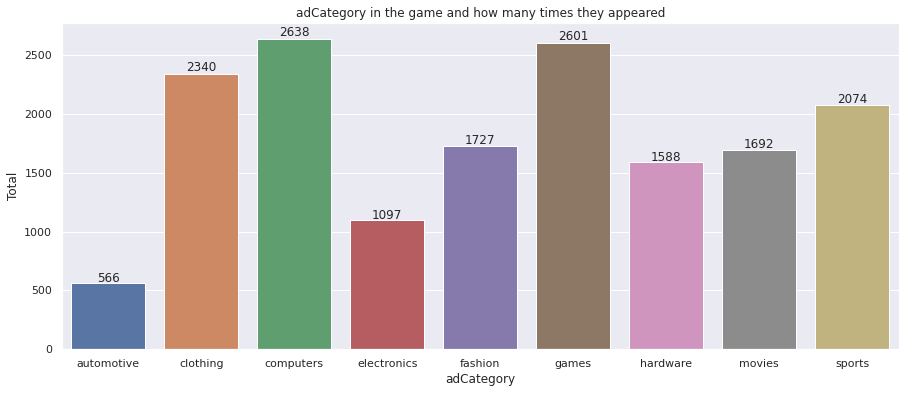

In [ ]:
adCategory=adCategory1['adCategory']
Count=adCategory1['Total']
p=sns.barplot(x=adCategory, y=Count,data=adCategory1, ci=None,order=adCategory)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="adCategory in the game and how many times they appeared")